# **머신러닝 실습 1. 신용카드 이상 탐지**

- 데이터셋은 거래의 시간, 금액과 같은 28개의 PCA 변환된 특성들을 포함하고 있으며, 'Class' 레이블은 사기 거래를 나타내는 1과 정상 거래를 나타내는 0으로 구분

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 데이터 불러오기
card_data = pd.read_csv('./creditcard.csv')
card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# target 데이터 (class)의 분포를 확인
print('Class Distribution: ')
print(card_data['Class'].value_counts())

# 위 모든 feature를 사용해서, class를 예측
data = card_data.drop(['Class'], axis=1)
target = card_data['Class']

Class Distribution: 
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=40, stratify=target)

# 데이터 표준화 작업 실시

ss = StandardScaler()
ss.fit(X_train)

standard_X_train = ss.transform(X_train)
standard_X_test = ss.transform(X_test)

In [ ]:
# 로지스틱 회귀 모델을 생성하고 학습

lr = LogisticRegression(C = 5, max_iter=200, random_state=40)

lr.fit(standard_X_train, y_train)

# 학습된 모델로 테스트 데이터를 예측하고 평가

predict = lr.predict(standard_X_test)

print('▶ 예측 결과: ', predict)
print('▶ 평가: ', lr.score(standard_X_test, y_test))
print('\n')

# 정확도, 정밀도, F1 Score를 예산 및 출력

from sklearn.metrics import accuracy_score, precision_score, f1_score

print('▶ 정확도: ', accuracy_score(y_test, predict))
print('▶ 정밀도: ', precision_score(y_test, predict))
print('▶ F1 점수: ', f1_score(y_test, predict))
print('\n')

# AUC 점수 계산
lr_auc_score = roc_auc_score(y_train, lr.predict_proba(standard_X_train)[:, 1])
print('▶ AUC 점수: ', lr_auc_score)

▶ 예측 결과:  [0 0 0 ... 0 0 0]
▶ 평가:  0.9990168884519505


▶ 정확도:  0.9990168884519505
▶ 정밀도:  0.85
▶ F1 점수:  0.6455696202531646


▶ AUC 점수:  0.9804289413860925


## Decision Tree로 해보기

In [ ]:
# 결정 트리 모델을 생성하고 학습

dt = DecisionTreeClassifier(random_state=40)

dt.fit(standard_X_train, y_train)

# 학습한 모델로 테스트 데이터를 예측하고 평가

print('▶ 예측 결과: ', dt.predict(standard_X_test))
print('▶ 평가: ', dt.score(standard_X_test, y_test))
print('\n')

# AUC 점수 계산
dt_auc_score = roc_auc_score(y_train, dt.predict_proba(standard_X_train)[:, 1])
print('▶ AUC 점수: ', dt_auc_score)

▶ 예측 결과:  [0 0 0 ... 0 0 0]
▶ 평가:  0.9992099996488887


▶ AUC 점수:  1.0


## Random Forest로 해보기

In [ ]:
# 랜덤 포레스트 모델을 생성하고 학습

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=40)

rf.fit(standard_X_train, y_train)

# 학습된 모델로 테스트 데이터를 예측하고 평가

print('▶ 예측 결과: ', rf.predict(standard_X_test))
print('▶ 평가: ', rf.score(standard_X_test, y_test))
print('\n')

# AUC 점수 계산
rf_auc_score = roc_auc_score(y_train, rf.predict_proba(standard_X_train)[:, 1])
print('▶ AUC 점수: ', rf_auc_score)

▶ 예측 결과:  [0 0 0 ... 0 0 0]
▶ 평가:  0.999403110845827


▶ AUC 점수:  0.9999994532207718


## 퀴즈) SVM 사용해보기

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='poly')

model.fit(standard_X_train, y_train)

# 학습된 모델로 테스트 데이터를 예측하고 평가

print('▶ 예측 결과: ', model.predict(standard_X_test))
print('▶ 평가: ', model.score(standard_X_test, y_test))
print('\n')

▶ 예측 결과:  [0 0 0 ... 0 0 0]
▶ 평가:  0.999420666409185




## 가장 AUC 점수가 높았던 모델 GridSearch로 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth': range(1, 10 ,1),
    'min_samples_split': range(2, 10, 1)
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=40), param, n_jobs=-1)
gs.fit(standard_X_train, y_train)
print(gs.best_params_)

KeyboardInterrupt: 

In [ ]:
model = gs.best_estimator_

print('▶ 평가: ', model.score(standard_X_test, y_test))

▶ 평가:  0.9995084442259752


# **머신러닝 실습 2. 금융 상품 이탈률 예측**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 데이터 로드
data = pd.read_csv('./BankChurners.csv')

data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# 필요한 열 선택
data = data[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

# 카테고리형 변수를 숫자로 매핑
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
data['Education_Level'] = data['Education_Level'].map({'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6})
data['Marital_Status'] = data['Marital_Status'].map({'Unknown': 0, 'Single': 1, 'Married': 3, 'Divorced': 3})
data['Income_Category'] = data['Income_Category'].map({'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5})
data['Card_Category'] = data['Card_Category'].map({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})

# Attrition_Flag 열 매핑, 'Existing Customer' → 0, 'Attrited Customer' → 1
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# 위 모든 feature를 사용해서, Attrition_Flag 예측
X = data.drop(['Attrition_Flag'], axis=1)
y = data['Attrition_Flag']

<ipython-input-3-972517aedb39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
<ipython-input-3-972517aedb39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education_Level'] = data['Education_Level'].map({'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6})
<ipython-input-3-972517aedb39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

# Random Forest 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=40)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)
print('▶ 예측 결과: ', y_pred)

# 결과 평가 (report 확인, confusion matrix 확인)
print('▶ report: ', classification_report(y_test, y_pred))
print('▶ confusion matrix: ', confusion_matrix(y_test, y_pred))

▶ 예측 결과:  [0 0 0 ... 0 0 0]
▶ report:                precision    recall  f1-score   support

           0       0.96      0.99      0.97      1709
           1       0.92      0.76      0.83       317

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026

▶ confusion matrix:  [[1687   22]
 [  77  240]]


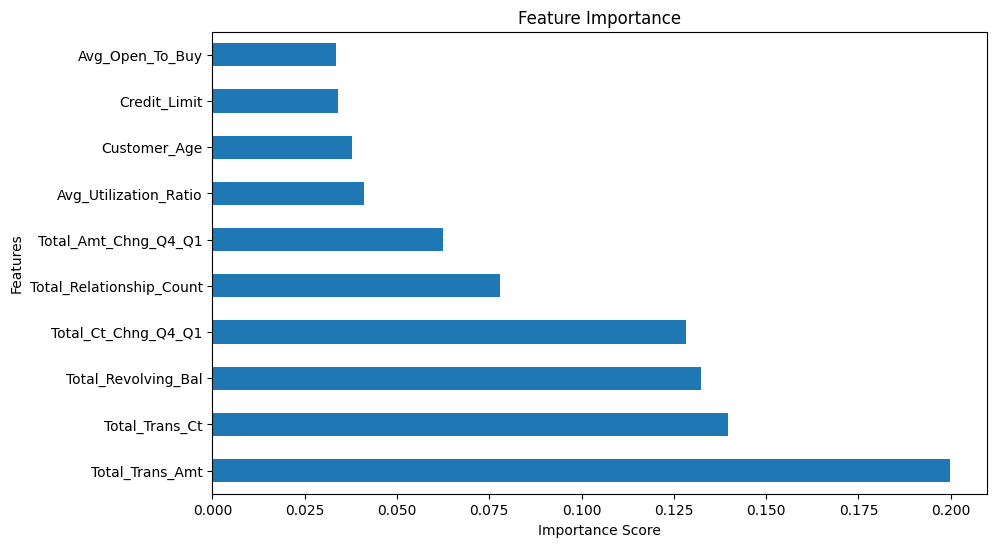

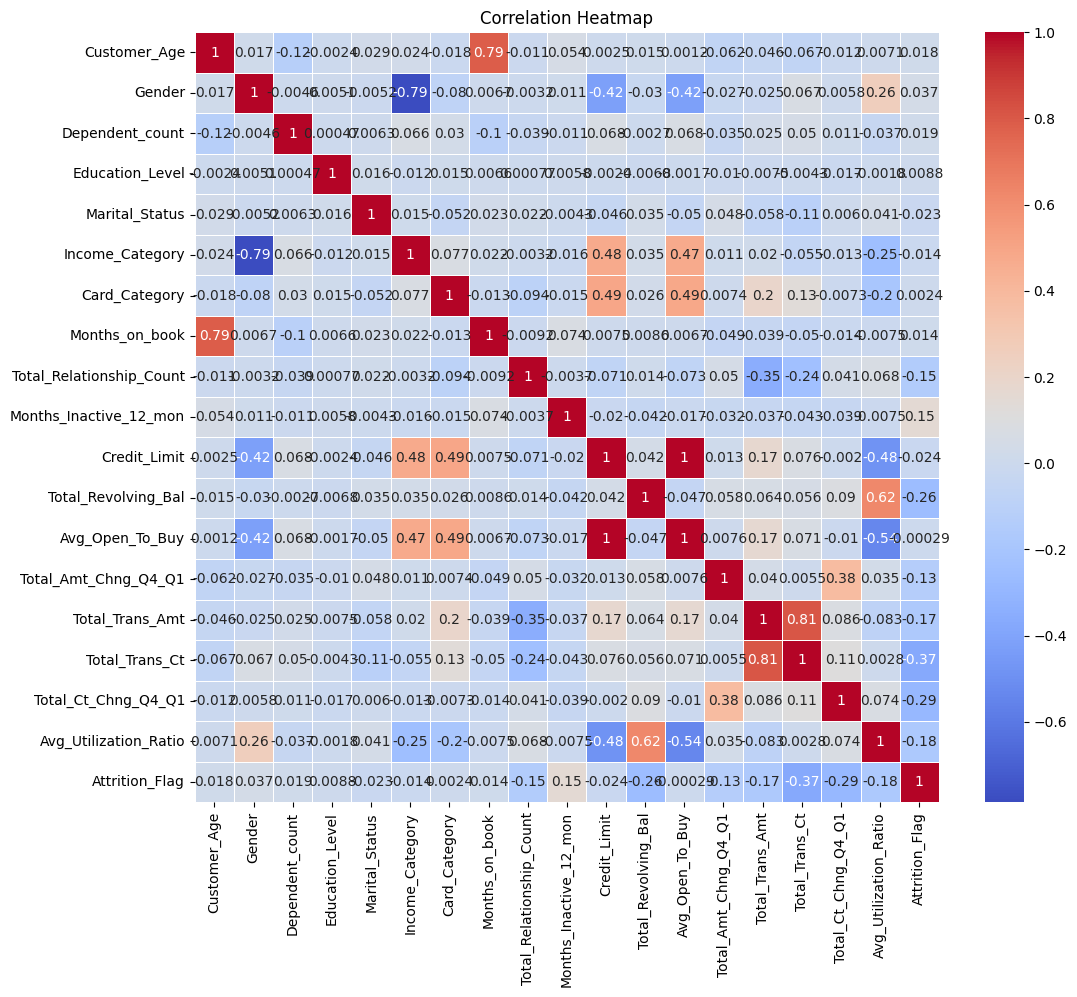

In [ ]:
# Feature Importance 시각화
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 상관 관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 최소 2가지 이상의 분류 모델을 추가로 적용하여 가장 성능이 높은 모델을 고르시오

In [ ]:
# 모델1 학습
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 5, max_iter=200, random_state=40)
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)
print('▶ 예측 결과: ', y_pred)

# 평가
print('▶ report: ', classification_report(y_test, y_pred))
print('▶ confusion matrix: ', confusion_matrix(y_test, y_pred))

▶ 예측 결과:  [0 0 0 ... 0 0 0]
▶ report:                precision    recall  f1-score   support

           0       0.91      0.97      0.94      1709
           1       0.72      0.45      0.56       317

    accuracy                           0.89      2026
   macro avg       0.81      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026

▶ confusion matrix:  [[1654   55]
 [ 173  144]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 모델2 학습
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=40)
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_test)
print('▶ 예측 결과: ', y_pred)

# 평가
print('▶ report: ', classification_report(y_test, y_pred))
print('▶ confusion matrix: ', confusion_matrix(y_test, y_pred))

▶ 예측 결과:  [0 1 0 ... 0 0 0]
▶ report:                precision    recall  f1-score   support

           0       0.96      0.96      0.96      1709
           1       0.78      0.80      0.79       317

    accuracy                           0.93      2026
   macro avg       0.87      0.88      0.87      2026
weighted avg       0.93      0.93      0.93      2026

▶ confusion matrix:  [[1638   71]
 [  64  253]]


# **머신러닝 실습 3. 대출 신용정보 평가 (분류, 회귀)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로드
data = pd.read_csv('./credit.csv')

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# 필요한 열 선택
data = data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History 열에는 결측값이 있습니다
# 결측값을 자율적으로 처리

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)

<ipython-input-143-11ea79ee7190>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
<ipython-input-143-11ea79ee7190>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
# 카테고리형 변수를 숫자로 매핑
le = LabelEncoder()

for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
  data[col] = le.fit_transform(data[col])

In [ ]:
# 특성과 타겟 분리
from sklearn.model_selection import train_test_split

# 학습용 데이터
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)

# 분류를 위한 평가 데이터
y_class = data['Loan_Status']

# 회귀를 위한 평가 데이터
y_reg = data['LoanAmount']

,LoanAmount
0,128.0
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [ ]:
# 훈련 데이터와 검증 데이터 분리

c_X_train, c_X_test, c_y_train, c_y_test = train_test_split(X, y_class, test_size=0.2, random_state=40)
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(X, y_reg, test_size=0.2, random_state=40)

## (분류) 로지스틱 회귀

In [ ]:
# 모델 정의
lr = LogisticRegression(C = 5, max_iter=200, random_state=40)

In [ ]:
# 모델 학습
lr.fit(c_X_train, c_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5, max_iter=200, random_state=40)

In [ ]:
# 모델 추론
lr_pred = lr.predict(c_X_test)

print(lr_pred)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1]


In [ ]:
# 모델 평가

# 분류 보고서 출력
print('Logisitic Regression Classification Report: ')
print(classification_report(lr_pred, c_y_test))

# 혼동 행렬 출력
print('\nConfusion Matrix: ')
print(confusion_matrix(lr_pred, c_y_test))

# 정확도 출력
print('\nAccuracy Score: ')
print(accuracy_score(lr_pred, c_y_test))

Logisitic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.39      0.86      0.53        14
           1       0.98      0.83      0.90       109

    accuracy                           0.83       123
   macro avg       0.68      0.84      0.71       123
weighted avg       0.91      0.83      0.85       123


Confusion Matrix: 
[[12  2]
 [19 90]]

Accuracy Score: 
0.8292682926829268


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'C': range(1, 10 ,1),
    'max_iter': range(0, 300, 10)
}

gs = GridSearchCV(LogisticRegression(random_state=40), param, n_jobs=-1)
gs.fit(c_X_train, c_y_train)
print(gs.best_params_)

{'C': 2, 'max_iter': 170}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr = gs.best_estimator_

## (분류) 랜덤포레스트

In [ ]:
# 모델 정의
rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=40)

In [ ]:
# 모델 학습
rfc.fit(c_X_train, c_y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=40)

In [ ]:
# 모델 추론
rfc_pred = rfc.predict(c_X_test)
print(rfc_pred)

[0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0
 0 1 1 1 1 0 0 1 1 1 1 1]


In [ ]:
# 모델 평가

# 분류 보고서 출력
print('Logisitic Regression Classification Report: ')
print(classification_report(rfc_pred, c_y_test))

# 혼동 행렬 출력
print('\nConfusion Matrix: ')
print(confusion_matrix(rfc_pred, c_y_test))

# 정확도 출력
print('\nAccuracy Score: ')
print(accuracy_score(rfc_pred, c_y_test))

Logisitic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.45      0.50      0.47        28
           1       0.85      0.82      0.83        95

    accuracy                           0.75       123
   macro avg       0.65      0.66      0.65       123
weighted avg       0.76      0.75      0.75       123


Confusion Matrix: 
[[14 14]
 [17 78]]

Accuracy Score: 
0.7479674796747967


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': range(1, 20 ,1),
}

gs = GridSearchCV(RandomForestClassifier(random_state=40), param, n_jobs=-1)
gs.fit(c_X_train, c_y_train)
print(gs.best_params_)

{'n_estimators': 17}


In [ ]:
rfc = gs.best_estimator_

In [ ]:
# Feature Importance 계산 및 시각화
feature_importances = rfc.feature_importances_
feature_names = X.columns

In [ ]:
# Feature Importance를 데이터프레임으로 변환

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

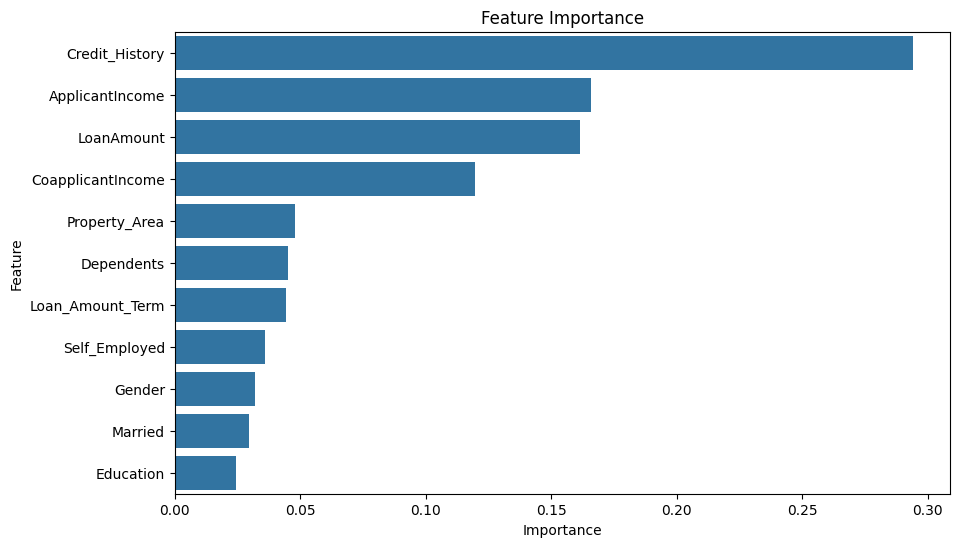

In [ ]:
# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## (회귀) 선형회귀 모델

In [ ]:
# 모델 정의
lir = LinearRegression()

In [ ]:
# 모델 학습
lir.fit(r_X_train, r_y_train)

LinearRegression()

In [ ]:
# 모델 추론
lir_pred = lir.predict(r_X_test)
print(lir_pred)

[138. 259. 160.  97. 120. 200. 108.  84. 144. 111. 187. 135. 112. 100.
 120. 119. 120.  60.  55. 134. 113.  75. 151.  50. 180. 200.  75. 132.
 111. 114. 225. 105. 138. 136. 125.  76. 110.  96.  17. 300. 181. 132.
 127. 120.  96. 110.  55. 125. 165. 153.  56. 128. 128. 161. 173. 122.
  87. 176. 126. 194. 105. 496. 152. 122. 128. 134. 143.  98. 280. 279.
 275.  96. 118. 128.  54. 116. 128. 110. 205. 160. 260. 108. 130. 133.
  66. 137. 330. 150. 160.  56. 172.  88. 210. 205.  67.  90. 112. 128.
 141. 185.  46. 110. 148. 168. 152.  40.  72. 495. 138. 182. 120. 173.
 128.  70.  45. 188. 110. 104.  90. 160. 255. 380. 115.]


In [ ]:
# 회귀모델 평가
print('Linear Regression: ')

# 평균 제곱 오차 계산 및 출력
mse = mean_squared_error(r_y_test, lir_pred)
print('Mean Squared Error: ', np.sqrt(mse))

# 회귀계수 값 계산 및 출력
r2 = r2_score(r_y_test, lir_pred)
print('R-squared: ', r2)

Linear Regression: 
Mean Squared Error:  2.0853300973226866e-12
R-squared:  1.0


## (회귀) 앙상블 기법을 이용한 회귀 알고리즘 적용

In [ ]:
# 아무 앙상블 기법 이용
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=40)

rfr.fit(r_X_train, r_y_train)

rfr_pred = rfr.predict(r_X_test)
print(rfr_pred)

[137.98 258.48 160.08  96.65 120.   200.91 107.89  83.82 144.41 110.91
 187.01 134.98 112.    99.99 120.01 117.79 120.01  59.79  54.57 133.86
 113.    74.64 150.99  49.02 180.25 200.09  74.58 132.05 110.93 113.62
 226.26 104.99 138.13 135.98 125.13  75.27 109.96  96.04  17.02 298.23
 180.   132.01 126.76 120.01  96.15 109.9   54.25 125.12 165.16 151.7
  55.15 128.   128.   160.81 172.56 122.05  87.1  174.98 125.91 193.38
 104.86 489.32 151.5  122.34 128.03 133.82 143.48  98.   277.4  275.65
 276.77  96.01 117.6  128.    53.25 115.99 128.   109.98 207.49 160.01
 260.74 107.93 130.   132.99  66.32 136.85 320.92 149.96 160.06  54.94
 171.96  87.71 209.96 207.31  66.37  89.42 112.02 127.99 140.41 184.81
  45.24 109.91 148.35 168.45 151.65  40.23  70.92 492.26 138.07 181.67
 120.05 172.56 128.    70.06  45.19 187.7  109.96 103.86  89.65 160.04
 255.07 377.11 115.03]


### 데이터 시각화

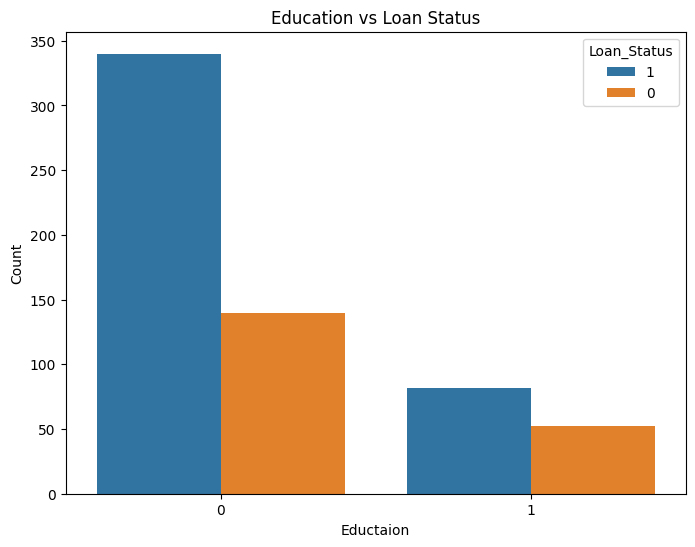

In [174]:
# 시각화
plt.figure(figsize = (8, 6))

# 데이터 복사 및 Loan_Status 열의 데이터 타입을 문자열로 변환
data_viz = data.copy()
data_viz['Loan_Status'] = data_viz['Loan_Status'].astype(str)

sns.countplot(x='Education', hue='Loan_Status', data=data_viz)

plt.title('Education vs Loan Status')
plt.xlabel('Eductaion')
plt.ylabel('Count')
plt.show()

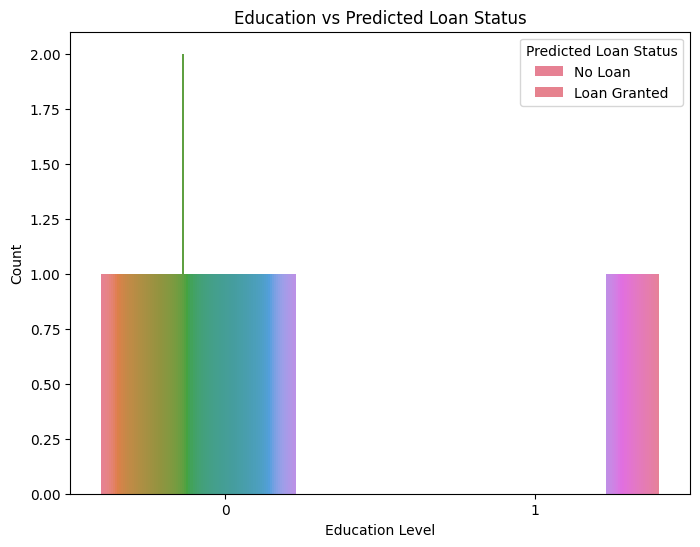

In [176]:
# 분류 결과에 대한 시각화
plt.figure(figsize=(8, 6))

# X_val 인덱스를 사용하여 원본 데이터에서 해당 행을 추출하고, 예측 결과를 문자열로 변환
viz_df = data.loc[data.index.isin(c_X_test.index)].copy()
viz_df['Predicted Loan Status'] = lir_pred.astype(str)

sns.countplot(x='Education', hue='Predicted Loan Status', data=viz_df)

plt.title('Education vs Predicted Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Predicted Loan Status', labels=['No Loan', 'Loan Granted'])
plt.show()

## 테스트 데이터로 결과 확인

In [ ]:
test_data = pd.read_csv('./test_Y3wMUE5_7gLdaTN.csv')

test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
# 필요한 열 선택
test_data = test_data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History 열에는 결측값이 있습니다
# 결측값을 자율적으로 처리

test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(), inplace=True)

<ipython-input-159-4f5474e6b329>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
<ipython-input-159-4f5474e6b329>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
# 카테고리형 변수를 숫자로 매핑
le = LabelEncoder()

for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
  test_data[col] = le.fit_transform(test_data[col])

X_data = test_data.drop(['Loan_ID'], axis=1)

In [ ]:
# 분류 모델 검증

test_lr_predict = lr.predict(X_data)
print('Logistic Regression: ')
print(test_lr_predict)

test_rfc_predict = rfc.predict(X_data)
print('\nRandom Forest Classifier: ')
print(test_rfc_predict)

# 회귀 모델 검증

test_lir_predict = lir.predict(X_data)
print('\nLinear Regression: ')
print(test_lir_predict)

pred_df = pd.DataFrame({
    'Loan_ID': test_data['Loan_ID'],
    'Loan_Status_Logistic_Regression': test_lr_predict,
    'Loan_Status_Random_Forest': test_rfc_predict,
    'Loan_Amount_Linear_Regression': test_lir_predict
})

pred_df.to_csv('loan_predictions.csv', index=False)

Logistic Regression: 
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]

Random Forest Classifier: 
[1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 